In [1]:

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/baryohay98/smp/main/ne_ziv_shilon.csv')
df = df.drop('(view source)', axis=1)
df.rename(columns={'Name (click to view profile)': 'Name'}, inplace=True)
df.fillna({'ComNum':-999, 'Likes':0}, inplace=True)
cols = ['ComNum', 'Likes']
df[cols] = df[cols].applymap(np.int64)
df['ComNum']= df['ComNum'].astype(str)
df['Nested']= df['Nested'].astype(str)



In [3]:
nestedcom = df[df['ComNum'] == '-999']
commswithnested = []
for index, row in nestedcom.iterrows():
    nestednum = str(row['Nested'])
    nestednum = nestednum[0:4]
    makaf = nestednum.find('-')
    nestednum = nestednum[0:makaf]
    commswithnested.append(nestednum)

comswithnested = set(commswithnested)
comswithnested


comswithnested.remove('na')
comswithnested

{'100',
 '104',
 '125',
 '134',
 '142',
 '149',
 '15',
 '150',
 '156',
 '161',
 '170',
 '176',
 '2',
 '210',
 '219',
 '241',
 '248',
 '25',
 '256',
 '257',
 '26',
 '262',
 '276',
 '290',
 '303',
 '305',
 '312',
 '314',
 '321',
 '343',
 '354',
 '358',
 '36',
 '385',
 '393',
 '416',
 '484',
 '492',
 '50',
 '501',
 '502',
 '506',
 '508',
 '510',
 '516',
 '53',
 '556',
 '563',
 '566',
 '568',
 '575',
 '618',
 '623',
 '63',
 '661',
 '669',
 '671',
 '68',
 '682',
 '69',
 '70',
 '71',
 '718',
 '723',
 '729',
 '742',
 '755',
 '772',
 '798',
 '809',
 '813',
 '820',
 '85',
 '87',
 '88',
 '89',
 '99'}

##Building nested comments graph network

In [4]:
comments_graph = []
comnumswithnested = df[df.ComNum.isin(comswithnested)]
comnumswithnested
author = 'זיו שילון'
comments_graph = []
number = 0
authornamenumber = author + ' ' + str(number)
for index, row in comnumswithnested.iterrows():
  name = str(row['Name']) + ' ' + str(row['ComNum'])
  tup = (authornamenumber,name)
  comments_graph.append(tup)

comments_graph


[('זיו שילון 0', 'סתיו סמנה סולטר 2'),
 ('זיו שילון 0', 'מיכל מיקי לוי 15'),
 ('זיו שילון 0', 'קרין גרינברג האוזר 25'),
 ('זיו שילון 0', 'Osher Cohen 26'),
 ('זיו שילון 0', 'Lior Twito 36'),
 ('זיו שילון 0', 'Orna Zouari 50'),
 ('זיו שילון 0', 'Hila Tehrani 53'),
 ('זיו שילון 0', 'עוזי הרוש 63'),
 ('זיו שילון 0', 'Lea Michal 68'),
 ('זיו שילון 0', 'Michal Zamir Nurieli 69'),
 ('זיו שילון 0', 'Talli Shiatsu 70'),
 ('זיו שילון 0', 'Yaron Porter 71'),
 ('זיו שילון 0', 'Zivit Levy 85'),
 ('זיו שילון 0', 'אורנית ממן אוחיון 87'),
 ('זיו שילון 0', 'Tal Pinker 88'),
 ('זיו שילון 0', 'אלין חן 89'),
 ('זיו שילון 0', 'Lilach Lasri 99'),
 ('זיו שילון 0', 'Hani Ben Haim Levi 100'),
 ('זיו שילון 0', 'Jenifer Friedman 104'),
 ('זיו שילון 0', 'Tal Zana 125'),
 ('זיו שילון 0', 'דרור יוסף 134'),
 ('זיו שילון 0', 'כרמית דוד זוזל 142'),
 ('זיו שילון 0', 'Sagit Avital 149'),
 ('זיו שילון 0', 'נוגה שרעבי 150'),
 ('זיו שילון 0', 'Anat Saban 156'),
 ('זיו שילון 0', 'Ayala Kehaty 161'),
 ('זיו שילון 0', 'Sharo

In [5]:

for index, row in nestedcom.iterrows():
  index = row['Nested'].rfind('-')
  num = row['Nested']
  comment = num[0:index]
  if "-" in comment:
    r = df.loc[(df["Nested"]) == comment]
    fullname = str(r.Name.values[0]) + ' ' + str(r.Nested.values[0])
  else:
    r = df.loc[(df["ComNum"]) == comment]
    if not r.empty:
      fullname = str(r.Name.values[0]) + ' ' + str(r.ComNum.values[0])
  nestedname = str(row['Name']) + ' ' + str(row['Nested'])
  tup = (fullname , nestedname)
  comments_graph.append(tup)


  

comments_graph




[('זיו שילון 0', 'סתיו סמנה סולטר 2'),
 ('זיו שילון 0', 'מיכל מיקי לוי 15'),
 ('זיו שילון 0', 'קרין גרינברג האוזר 25'),
 ('זיו שילון 0', 'Osher Cohen 26'),
 ('זיו שילון 0', 'Lior Twito 36'),
 ('זיו שילון 0', 'Orna Zouari 50'),
 ('זיו שילון 0', 'Hila Tehrani 53'),
 ('זיו שילון 0', 'עוזי הרוש 63'),
 ('זיו שילון 0', 'Lea Michal 68'),
 ('זיו שילון 0', 'Michal Zamir Nurieli 69'),
 ('זיו שילון 0', 'Talli Shiatsu 70'),
 ('זיו שילון 0', 'Yaron Porter 71'),
 ('זיו שילון 0', 'Zivit Levy 85'),
 ('זיו שילון 0', 'אורנית ממן אוחיון 87'),
 ('זיו שילון 0', 'Tal Pinker 88'),
 ('זיו שילון 0', 'אלין חן 89'),
 ('זיו שילון 0', 'Lilach Lasri 99'),
 ('זיו שילון 0', 'Hani Ben Haim Levi 100'),
 ('זיו שילון 0', 'Jenifer Friedman 104'),
 ('זיו שילון 0', 'Tal Zana 125'),
 ('זיו שילון 0', 'דרור יוסף 134'),
 ('זיו שילון 0', 'כרמית דוד זוזל 142'),
 ('זיו שילון 0', 'Sagit Avital 149'),
 ('זיו שילון 0', 'נוגה שרעבי 150'),
 ('זיו שילון 0', 'Anat Saban 156'),
 ('זיו שילון 0', 'Ayala Kehaty 161'),
 ('זיו שילון 0', 'Sharo

In [6]:
g = nx.DiGraph()
g.add_edges_from(comments_graph)


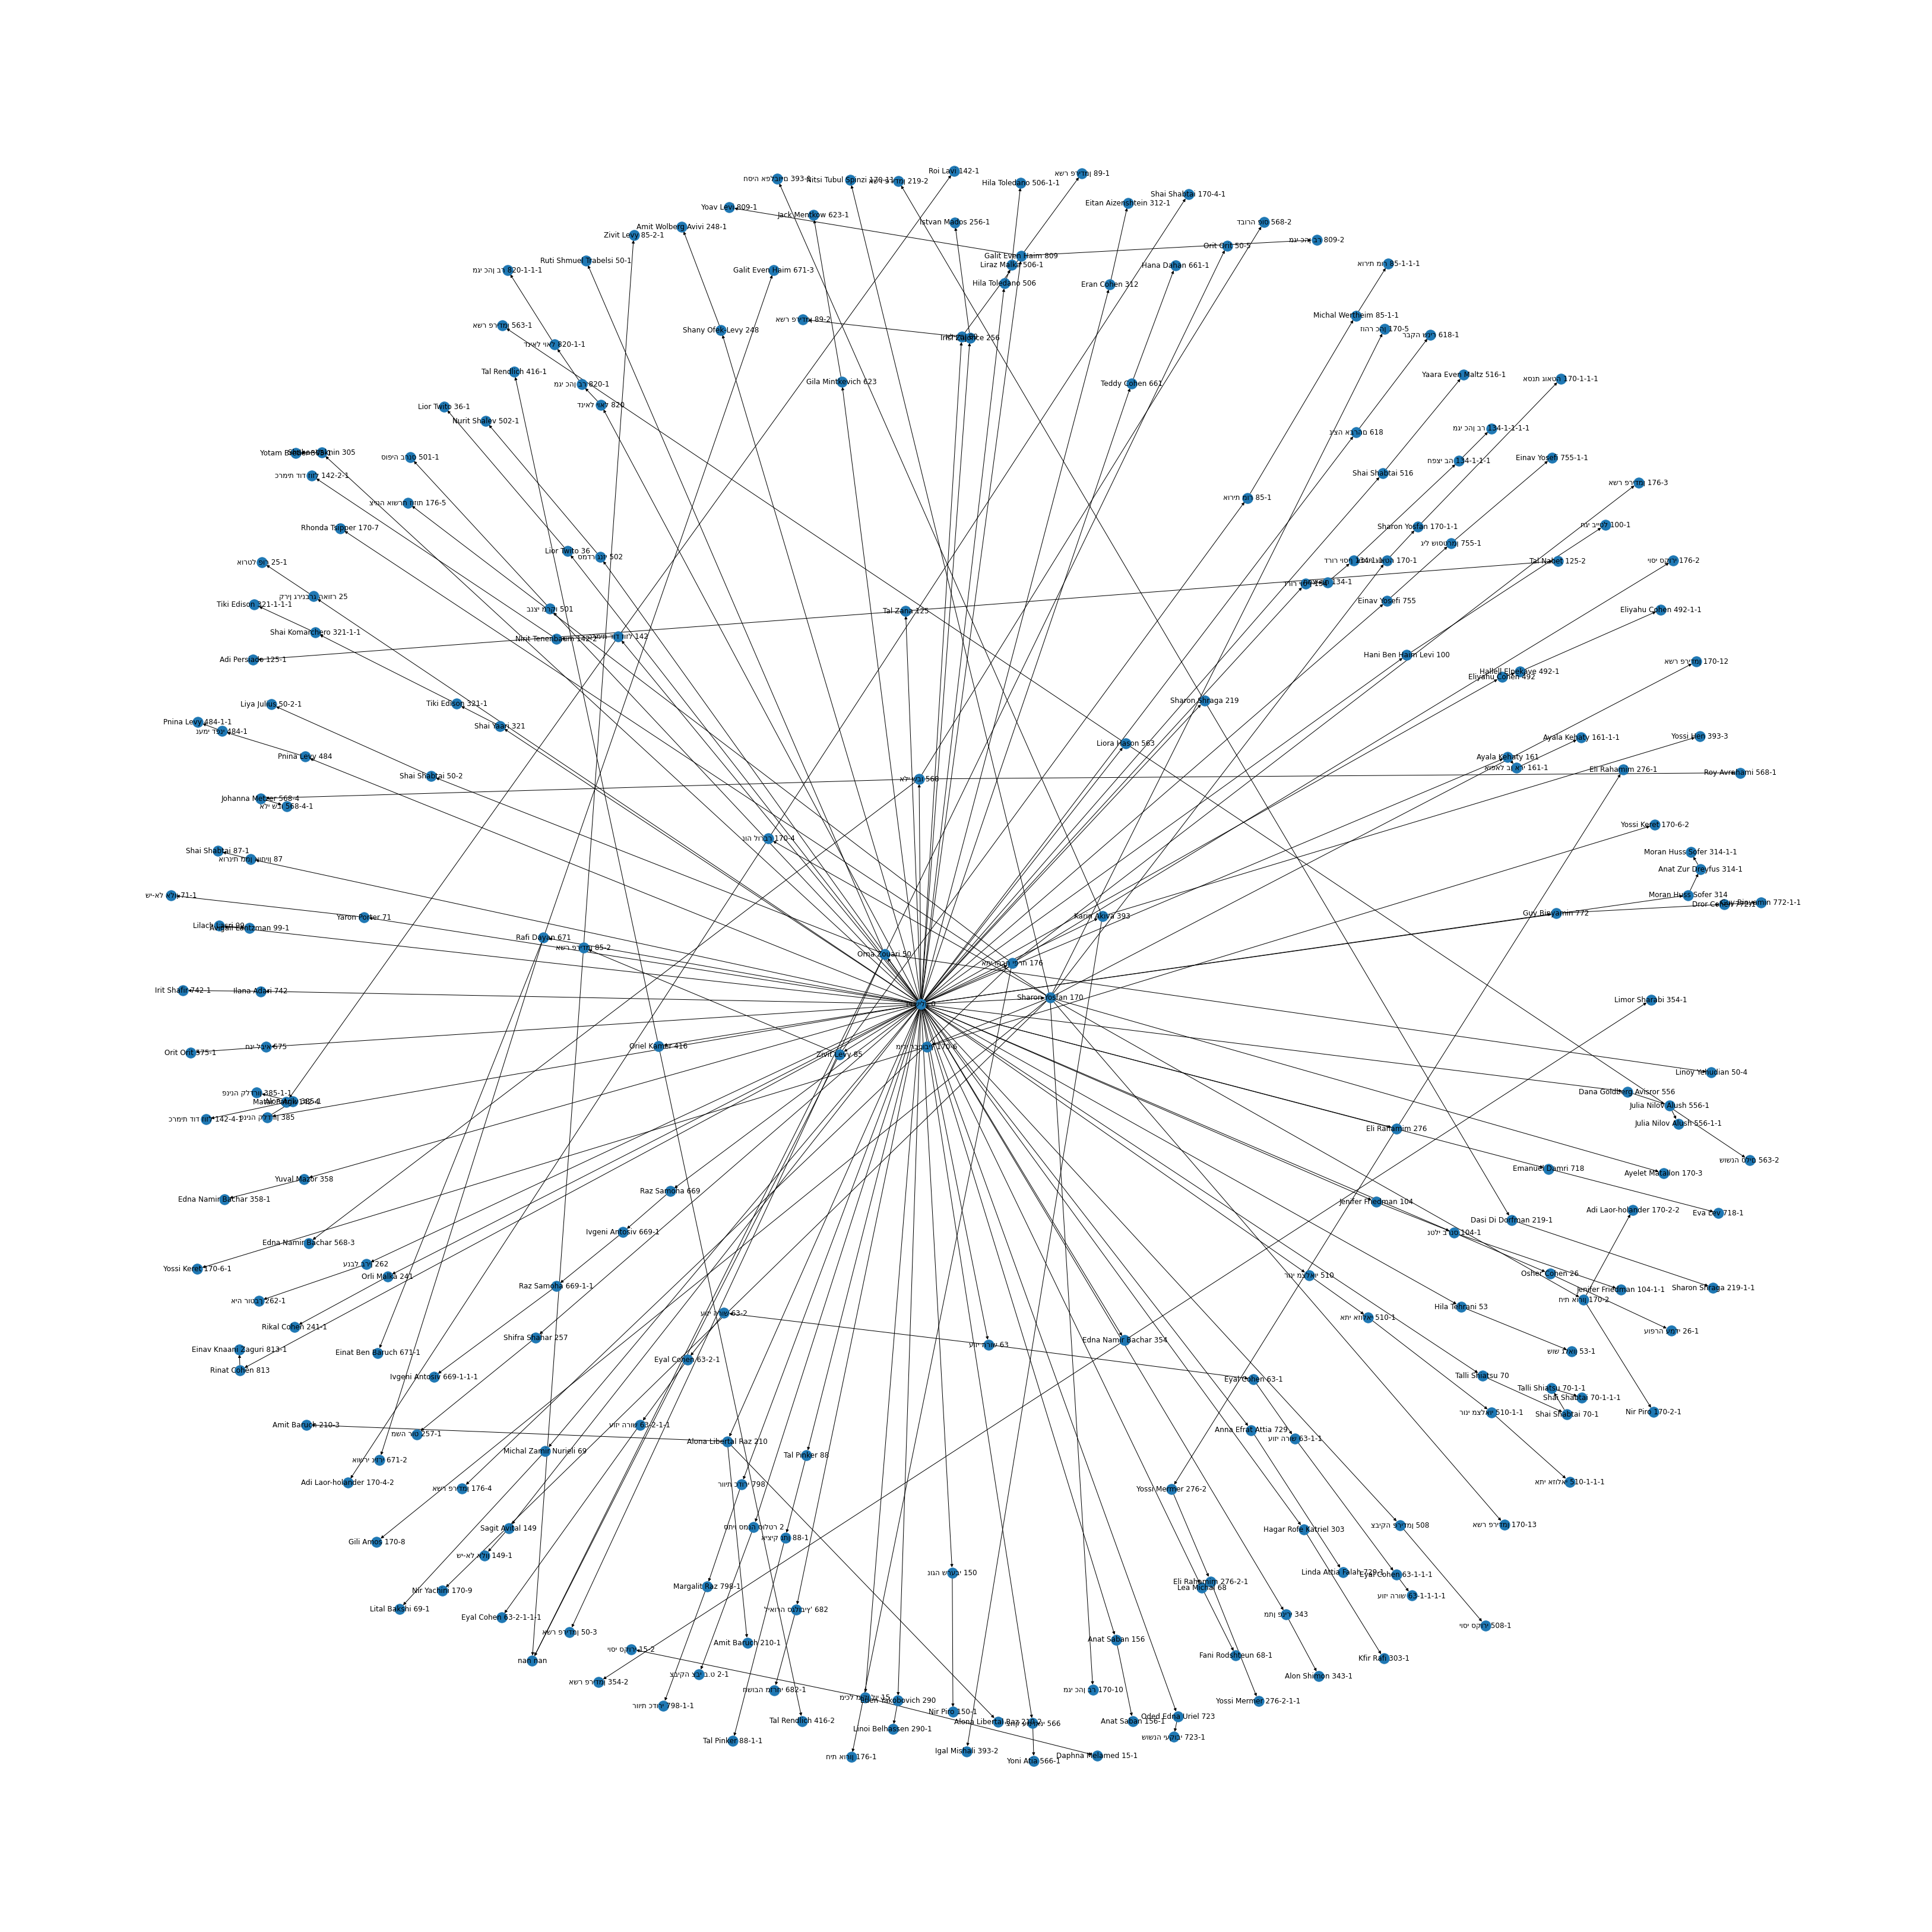

<Figure size 3240x3240 with 0 Axes>

In [7]:
plt.rcParams["figure.figsize"] = (45,45)
nx.draw(g,with_labels = True)
plt.show()
plt.savefig('foo.png')

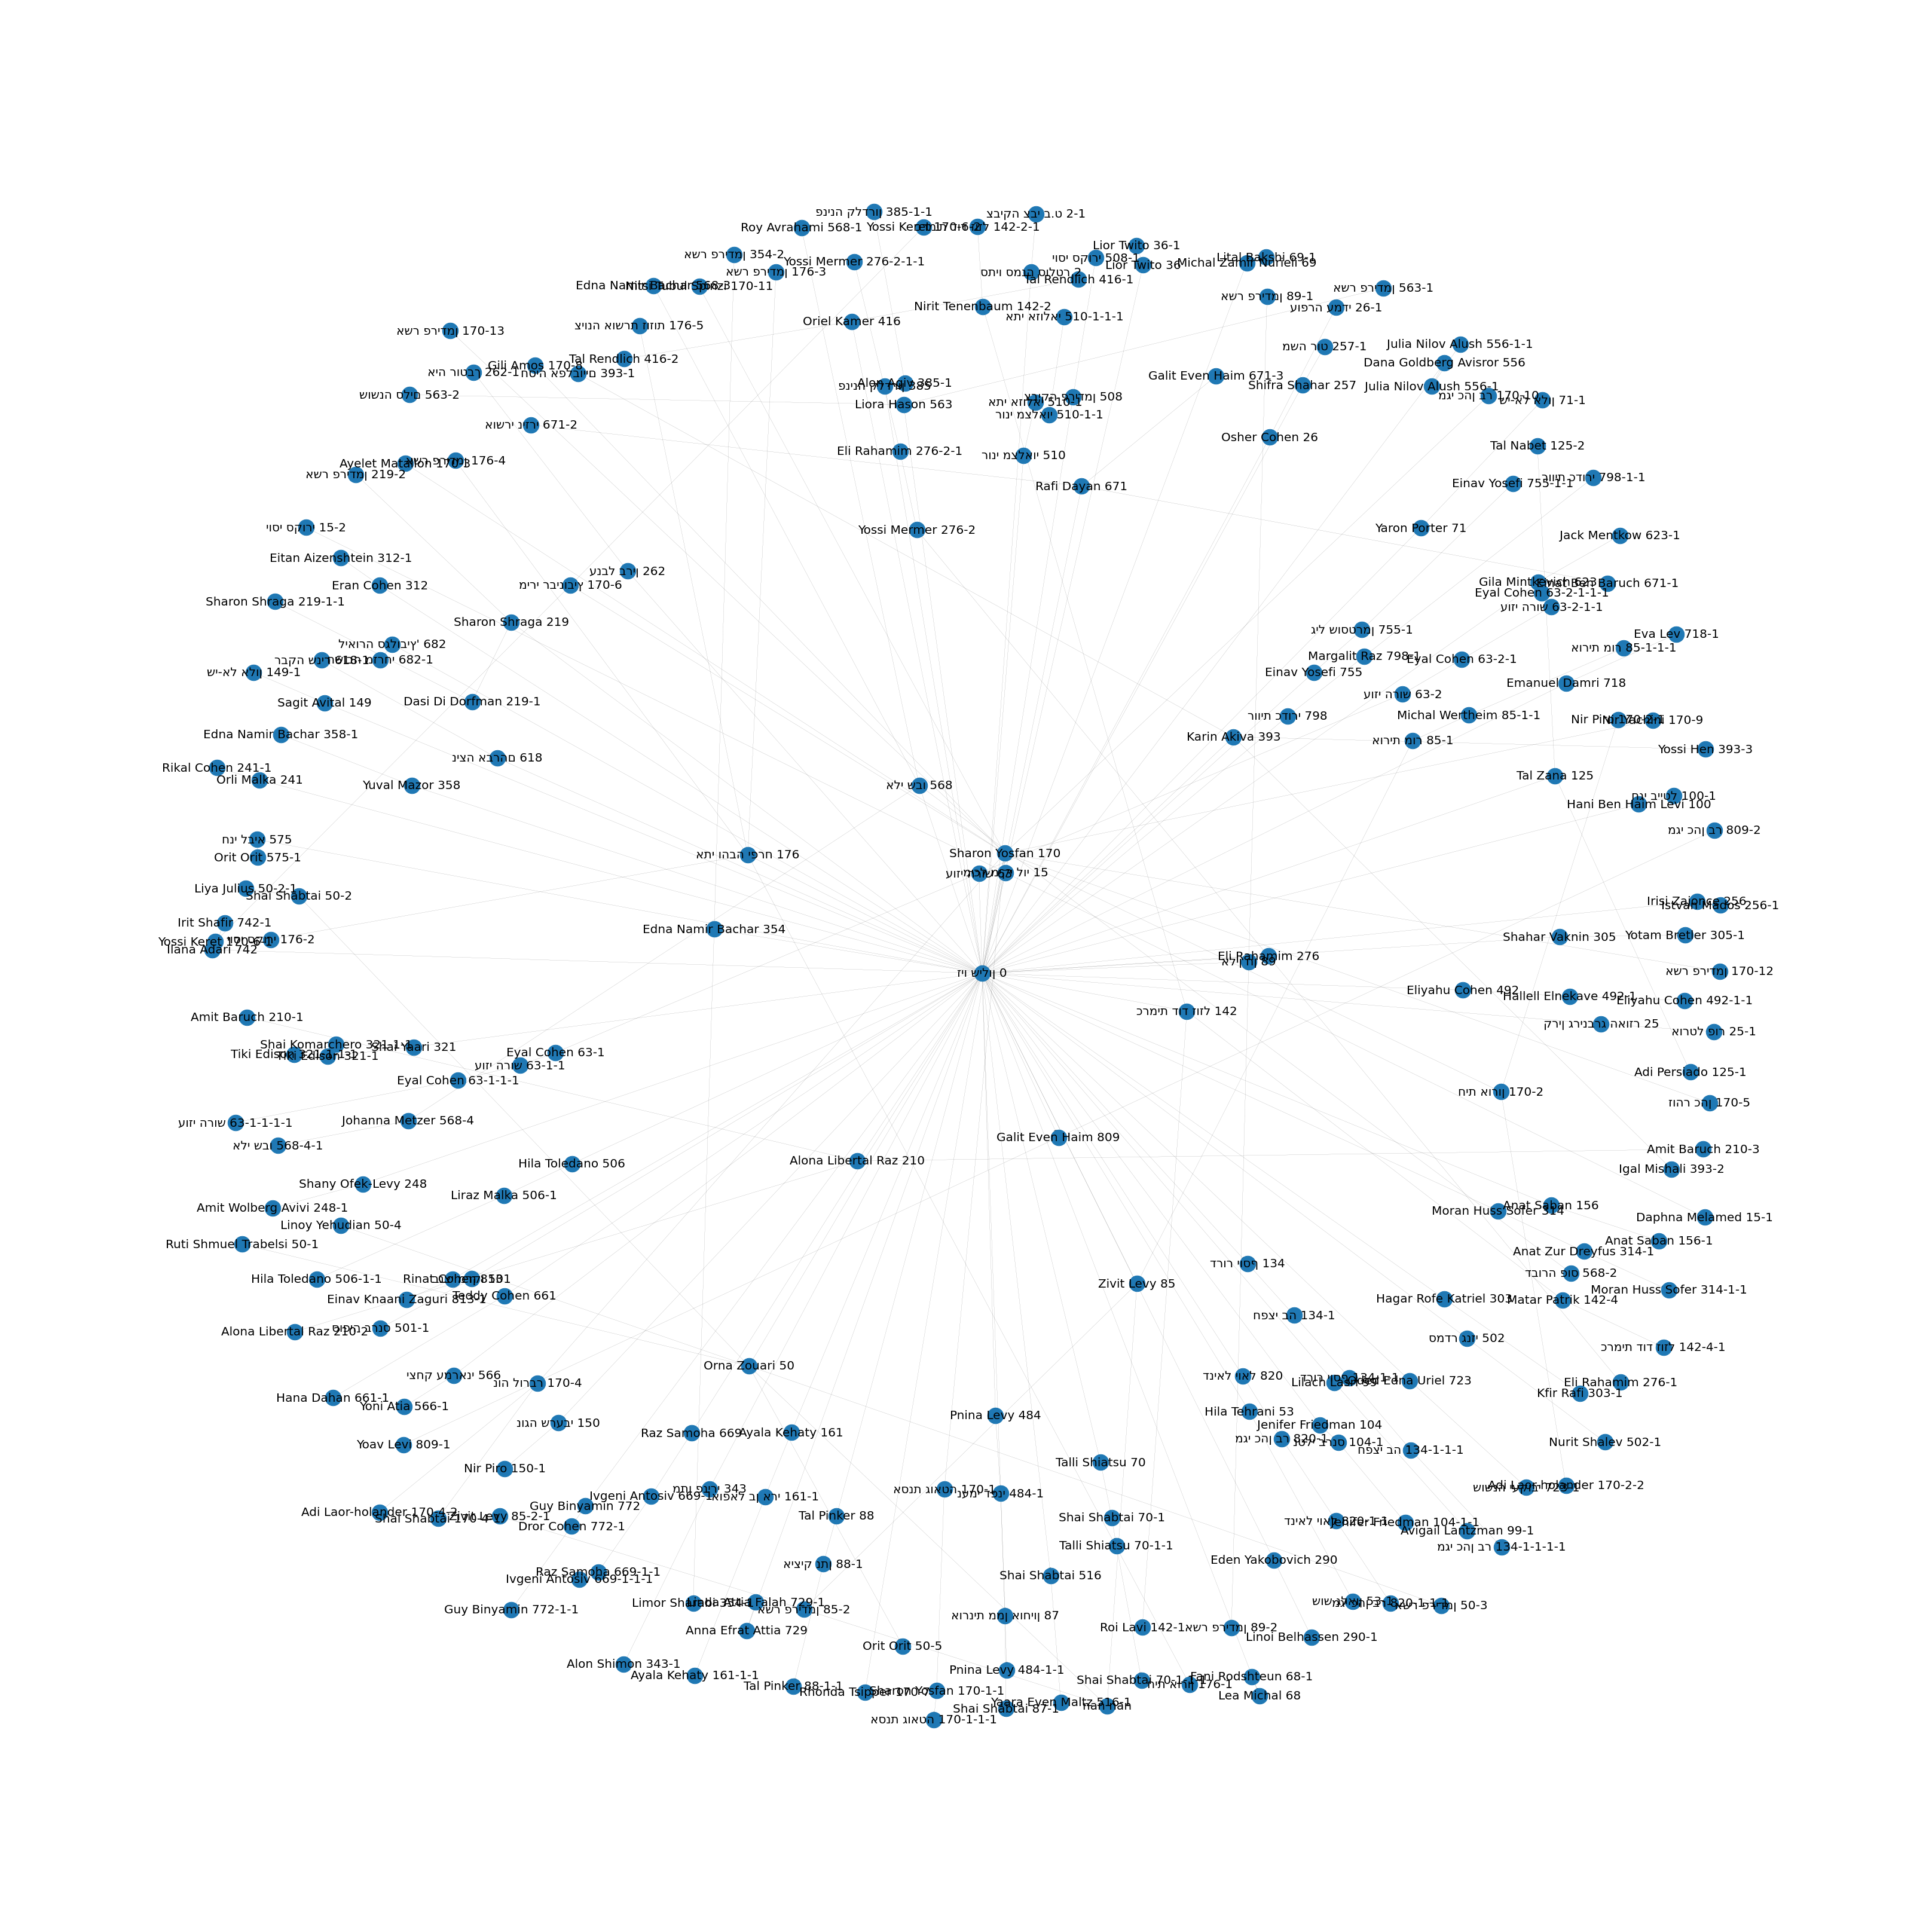

In [8]:

widths = np.array([w for *_, w in g.edges.data('weight')])

pos = nx.spring_layout(g, seed=7)  # positions for all nodes - seed for reproducibi

# nodes
nx.draw_networkx_nodes(g, pos, node_size=700)

# edges
nx.draw_networkx_edges(g, pos, width=0.01*10)  # using a 10x scale factor here

# labels
nx.draw_networkx_labels(g, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

##Text Models


In [9]:
comnumformodels = []
for index, row in df.iterrows():
  num = row['ComNum']
  num = num[0:3]
  if num[0] != '-':
    if "-" in num:
      num = num[0:2]
    comnumformodels.append(num)



  

In [10]:
df1 = df.copy()
df1['Nested'] = df1['Nested'].astype(str)
df1['Nested1'] = df['Nested'].str[0:3]
df1['Nested1'] = df1['Nested1'].astype(str)


In [11]:

d = []
for n in comnumformodels:
  number = int(n)
  if number < 10:
    nested = n + '-1' 
  elif number > 9 and number < 100:
    nested = n + '-'
  else:
    nested = n
  comments = df1.loc[(df1["ComNum"] == n) | (df1["Nested1"] == nested)]
  text = ''
  for index, row in comments.iterrows():
    text = text + ' ' + row['Comment']
  temp = [n,text]
  d.append(temp)



In [12]:
models = pd.DataFrame(d, columns=['ComNumber', 'Text'])



#Punctuation Removal


In [13]:
import string
string.punctuation
stringpunc = string.punctuation + '״"'
stringpunc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~״"'

In [14]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in stringpunc])
    return punctuationfree
#storing the puntuation free text
models['clean_text']= models['Text'].apply(lambda x:remove_punctuation(x))
models.head()

ComNumber                                               Text  \
0         1                            עצוב רפואה שלמה אמן????   
1         2   מכעיס ומטריף את המוח, אנשים שנתנו את השנים הי...   
2         3                 זה עוד הפקרה פושעת של משרד הבידחון   
3         4   הגיע הזמן שהמדינה תתחיל לטפל בנפגעים לאורך זמ...   
4         5   מצמרר חייבים שינוי לגיבורי ישראל מגיע כל טיפו...   

                                          clean_text  
0                                עצוב רפואה שלמה אמן  
1   מכעיס ומטריף את המוח אנשים שנתנו את השנים היפ...  
2                 זה עוד הפקרה פושעת של משרד הבידחון  
3   הגיע הזמן שהמדינה תתחיל לטפל בנפגעים לאורך זמ...  
4   מצמרר חייבים שינוי לגיבורי ישראל מגיע כל טיפו...

#Tokenization


In [15]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
models['clean_words'] = models['clean_text'].apply(lambda x:word_tokenize(x))

In [17]:
nestedonlyformodel = models[models.ComNumber.isin(comswithnested)]
nestedonlyformodel
models


ComNumber                                               Text  \
0           1                            עצוב רפואה שלמה אמן????   
1           2   מכעיס ומטריף את המוח, אנשים שנתנו את השנים הי...   
2           3                 זה עוד הפקרה פושעת של משרד הבידחון   
3           4   הגיע הזמן שהמדינה תתחיל לטפל בנפגעים לאורך זמ...   
4           5   מצמרר חייבים שינוי לגיבורי ישראל מגיע כל טיפו...   
..        ...                                                ...   
858       859                       נורא ממש, רק שיצילו אותו בעה   
859       860   במדינה שלנובשביל כל דבר מוצאיםתקציבים, לוקח ז...   
860       861   כואב לראות שיש כסף למטוס, ואין כסף ללוחמים שנ...   
861       862         מערכת רקובה בזויה ומבזה. מקווה שהתעוררתם.    
862       863   בחדשות: ״הצית את עצמו מסיבה לא ברורה.״ ממש לא...   

                                            clean_text  \
0                                  עצוב רפואה שלמה אמן   
1     מכעיס ומטריף את המוח אנשים שנתנו את השנים היפ...   
2                   זה עוד הפקרה פושעת של משרד הבידחון   
3     הגיע הזמן שהמדינה תתחיל לטפל בנפגעים לאורך זמ...   
4     מצמרר חייבים שינוי לגיבורי ישראל מגיע כל טיפו...   
..                                                 ...   
858                        נורא ממש רק שיצילו אותו בעה   
859   במדינה שלנובשביל כל דבר מוצאיםתקציבים לוקח זמ...   
860   כואב לראות שיש כסף למטוס ואין כסף ללוחמים שנת...   
861           מערכת רקובה בזויה ומבזה מקווה שהתעוררתם    
862   בחדשות הצית את עצמו מסיבה לא ברורה ממש לא ברו...   

                                           clean_words  
0                             [עצוב, רפואה, שלמה, אמן]  
1    [מכעיס, ומטריף, את, המוח, אנשים, שנתנו, את, הש...  
2           [זה, עוד, הפקרה, פושעת, של, משרד, הבידחון]  
3    [הגיע, הזמן, שהמדינה, תתחיל, לטפל, בנפגעים, לא...  
4    [מצמרר, חייבים, שינוי, לגיבורי, ישראל, מגיע, כ...  
..                                                 ...  
858                 [נורא, ממש, רק, שיצילו, אותו, בעה]  
859  [במדינה, שלנובשביל, כל, דבר, מוצאיםתקציבים, לו...  
860  [כואב, לראות, שיש, כסף, למטוס, ואין, כסף, ללוח...  
861     [מערכת, רקובה, בזויה, ומבזה, מקווה, שהתעוררתם]  
862  [בחדשות, הצית, את, עצמו, מסיבה, לא, ברורה, ממש...  

[863 rows x 4 columns]

##Top2VEC 


In [18]:

!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 16.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 296 kB/s 
     |████████████████████████████████| 24.1 MB 64.8 MB/s 
     |████████████████████████████████| 1.1 MB 64.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340704 sha256=2197fb0cb46ee6105ad8dd3c5d6a992f8d0b8e19d5f696f5fc5ca75ccffb627c
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=2e0a3acc25d103bdf388d9bff3fa1095e8423e316ece92d53dad9003cc4c3466
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Crea

In [19]:
from top2vec import Top2Vec


In [20]:
nestedonlyformodel.reset_index(drop=True)
docs = models.clean_text.tolist()


In [21]:
model = Top2Vec(docs)

2022-11-14 22:33:50,744 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-11-14 22:33:50,874 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-14 22:33:52,981 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-14 22:34:10,288 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-14 22:34:10,338 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [22]:
topic_sizes,topic_nums = model.get_topic_sizes()
print(topic_sizes)
topic_words, word_scores, topic_nums = model.get_topics()
for words ,scores ,num in zip(topic_words,word_scores,topic_nums):
  print(num)
  print(f"Words: {words}")


[471 392]
0
Words: ['צהל' 'צריך' 'אותם' 'כל' 'בושה' 'כמה' 'לו' 'שלא' 'את' 'של' 'ולא' 'אני'
 'להם' 'שלנו' 'הלב' 'המדינה' 'כך' 'הביטחון' 'עם' 'לי' 'אין' 'על' 'כואב'
 'הם' 'פשוט' 'שלמה' 'משרד' 'מה' 'רק' 'עצוב' 'זה' 'לא' 'מאוד' 'מי']
1
Words: ['אין' 'בושה' 'המדינה' 'זה' 'משרד' 'להם' 'של' 'כואב' 'פשוט' 'לא' 'עצוב'
 'הביטחון' 'שלמה' 'את' 'צהל' 'על' 'רק' 'שלנו' 'אני' 'ולא' 'כל' 'צריך' 'עם'
 'לי' 'מאוד' 'אותם' 'כך' 'לו' 'הם' 'הלב' 'מי' 'כמה' 'מה' 'שלא']


#LDA

In [23]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
lda_data = models.clean_words.values.tolist()


In [24]:
id2word = corpora.Dictionary(lda_data)
texts = lda_data
corpus = [id2word.doc2bow(text) for text in texts]


In [25]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [26]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0, '0.010*"את" + 0.007*"אין" + 0.006*"מילים" + 0.006*"לי" + 0.006*"על" + 0.005*"לא" + 0.005*"צהל" + 0.005*"טובות" + 0.004*"מי" + 0.004*"עד"'), (1, '0.022*"את" + 0.022*"לא" + 0.018*"של" + 0.013*"על" + 0.009*"מה" + 0.007*"זה" + 0.007*"כל" + 0.006*"רק" + 0.006*"הביטחון" + 0.005*"צהל"'), (2, '0.043*"עצוב" + 0.022*"הלב" + 0.018*"את" + 0.015*"כל" + 0.013*"כואב" + 0.013*"כך" + 0.011*"ממש" + 0.010*"שלמה" + 0.010*"מאוד" + 0.010*"נורא"'), (3, '0.018*"את" + 0.016*"לא" + 0.009*"זה" + 0.007*"עם" + 0.007*"ולא" + 0.007*"המדינה" + 0.006*"כל" + 0.006*"להם" + 0.006*"על" + 0.006*"למה"'), (4, '0.007*"בן" + 0.006*"יְיָ" + 0.006*"שַׁעֲרֵי" + 0.005*"ה" + 0.004*"עַל" + 0.004*"שיהיה" + 0.003*"במצב" + 0.003*"חברים" + 0.003*"לֹא" + 0.003*"העניים"')]


## NOT FINISHED YET

